<a href="https://colab.research.google.com/github/isurushanaka/AII_Course-1/blob/main/Neural%20Networks/4_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

#### [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database): Handwritten Digits

![sample](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

In [ ]:
# Load the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


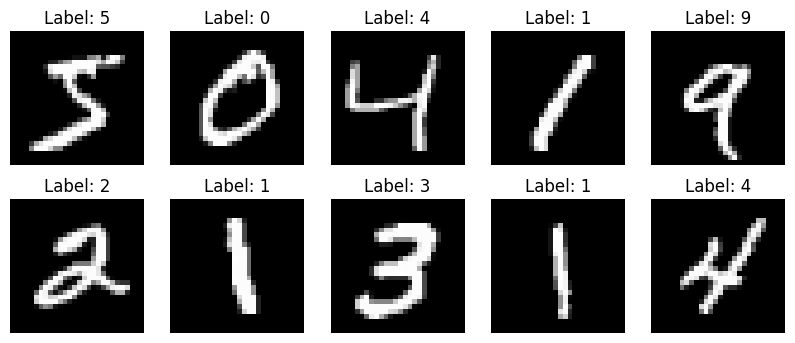

In [ ]:
# Plot some examples from the test set
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

In [ ]:
# Preprocess the data
x_train = x_train.reshape(60000, 784) # Flatten the images (28x28 pixels) into 1D vectors
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255 # Normalize pixel values to the range 0-1
x_test = x_test.astype('float32') / 255
y_train = np.eye(10)[y_train] # Convert class labels to one-hot encoded vectors
y_test = np.eye(10)[y_test]

In [ ]:
# Define the MLP model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 20ms/step - loss: 0.2162 - accuracy: 0.9363 - val_loss: 0.1229 - val_accuracy: 0.9614
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0796 - accuracy: 0.9747 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0675 - val_accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0746 - val_accuracy: 0.9785
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0648 - val_accuracy: 0.9815
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.0684 - val_accuracy: 0.9790
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0710 - val_accuracy: 0.981

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0877 - accuracy: 0.9803
Test loss: 0.08768399059772491
Test accuracy: 0.9803000092506409


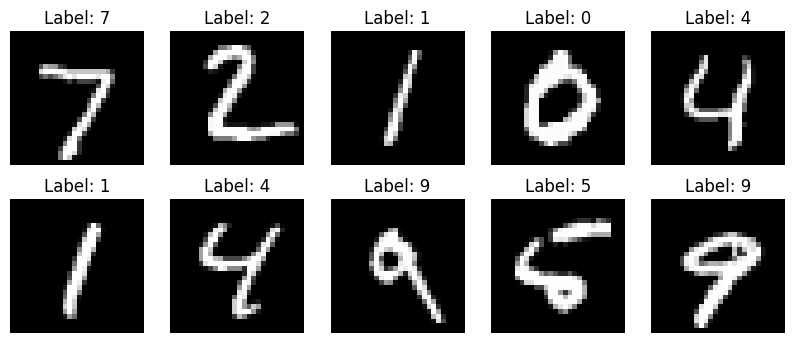

In [ ]:
# Plot some examples from the test set
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {np.argmax(y_test[i])}')
    ax.axis('off')
plt.show()

# Image Classification with CNN

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 29s 56ms/step - loss: 0.3491 - accuracy: 0.9045 - val_loss: 0.1544 - val_accuracy: 0.9568
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 0.1268 - accuracy: 0.9647 - val_loss: 0.1017 - val_accuracy: 0.9716
Epoch 3/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0893 - accuracy: 0.9747 - val_loss: 0.0790 - val_accuracy: 0.9754
Epoch 4/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0724 - accuracy: 0.9792 - val_loss: 0.0705 - val_accuracy: 0.9787
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0621 - accuracy: 0.9818 - val_loss: 0.0661 - val_accuracy: 0.9787
Epoch 6/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0549 - accuracy: 0.9842 - val_loss: 0.0654 - val_accuracy: 0.9784
Epoch 7/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0506 - accuracy: 0.9854 - val_loss: 0.0588 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Test Loss: 0.0531
Test Accuracy: 0.9821


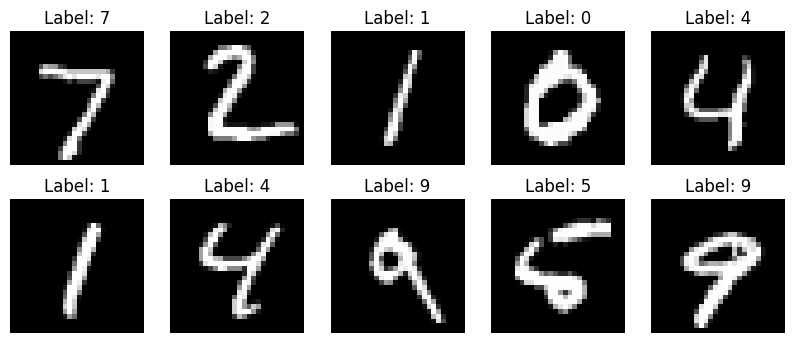

In [ ]:
# Plot some examples from the test set
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {np.argmax(y_test[i])}')
    ax.axis('off')
plt.show()